In [1]:
# Import modules
import glob
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
from datetime import datetime
import cartopy.crs as ccrs
%matplotlib inline
from scipy import integrate
from numpy import exp

# problem1.1

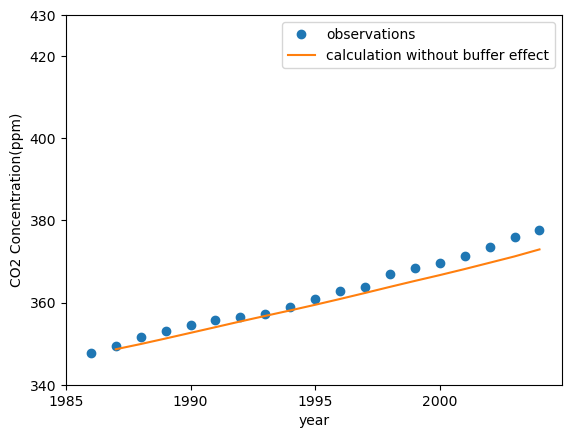

In [2]:
#读取实际观测数据进行后续绘图
co2 = pd.read_csv("co2_annmean_mlo.csv")
df=co2.loc[ (co2['year'] >1985)&(co2['year'] <2005)][['year','mean']]
#模型内参数y，人类活动影响。读取文件建立函数
def Y(t):
    Y0 = pd.read_csv("global.1751_2008.csv")
    Y=float(Y0.loc[ (Y0['Year'] ==int(t))]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return Y
# Define the function
def model(f, t,k12,k21):
    N1,N2=f
    dfdt = [-k12*N1+k21*N2+Y(t),k12*N1-k21*N2]
    return dfdt
k12 = 105/740
k21 = 102/900
# Initial condition
f0 = [740/2.13,900/2.13]
# Time points
t = np.linspace(1986,2004,19)
# Solve ODE
f = integrate.odeint(model, f0, t,args=(k12,k21))
y1=f[:,0]
plt.plot(df['year'], df['mean'],'o',label='observations')
# Plot results
plt.plot(t[1:19], y1[1:19],label='calculation without buffer effect')
plt.xlabel('year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend()
plt.show()

# problem1.2

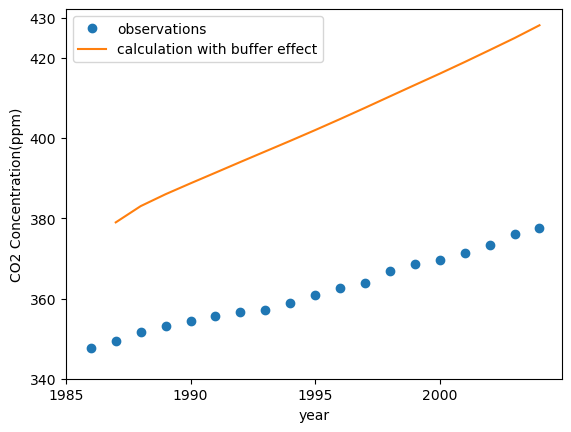

In [3]:
#读取实际观测数据进行后续绘图
co2 = pd.read_csv("co2_annmean_mlo.csv")
df=co2.loc[ (co2['year'] >1985)&(co2['year'] <2005)][['year','mean']]
#模型内参数y，人类活动影响。读取文件建立函数
def Y(t):
    Y0 = pd.read_csv("global.1751_2008.csv")
    Y=float(Y0.loc[ (Y0['Year'] ==int(t))]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return Y
#按附录内函数编写xi
def Xi(N1):
    Xi=3.69+1.86/100*N1-1.8*(1e-6)*N1*N1
    return Xi
# Define the function
def model(f, t,k12,k21,N02):
    N1,N2=f
    dfdt = [-k12*N1+k21*(N02+Xi(N1)*(N2-N02))+Y(t),k12*N1-k21*(N02+Xi(N1)*(N2-N02))]
    return dfdt
k12 = 105/740
k21 = 102/900
N02=(900-79)/2.13
# Initial condition
f0 = [740/2.13,900/2.13]
# Time points
t2 = np.linspace(1985,2004,20)
# Solve ODE
f = integrate.odeint(model, f0, t2,args=(k12,k21,N02))
y2=f[:,0]
plt.plot(df['year'], df['mean'],'o',label='observations')
# Plot results
plt.plot(t2[2:20], y2[2:20],label='calculation with buffer effect')
plt.xlabel('year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend()
plt.show()

# problem1.3

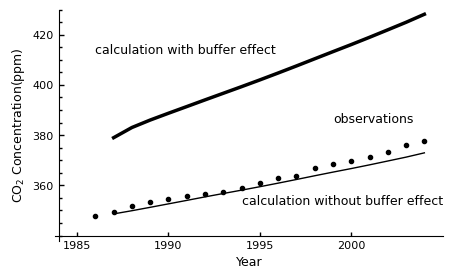

In [4]:
#设置图片大小
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
#添加绘图数据，设置线形及颜色
plt.plot(t[1:19], y1[1:19],label='calculation without buffer effect',linewidth=1,color='k')
plt.plot(t2[2:20], y2[2:20],label='calculation with buffer effect',linewidth=2.5,color='k')
plt.plot(df['year'], df['mean'],'o',label='observations',color='k',markersize=3)
#添加坐标轴标题
plt.xlabel('Year',fontsize=9)
plt.ylabel('CO$_{2}$ Concentration(ppm)',fontsize=9)
#设置xy轴长短
plt.xlim(1983.8,2005)
plt.ylim(338,430)
#xy轴主刻度值显示大小
plt.xticks([1985,1990,1995,2000])
plt.yticks([360,380,400,420])
#去除右边及上面的边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#设置主副刻度
ax.minorticks_on()
ax.tick_params(axis='y',which='major',direction='in',width=1,length=3.5)
ax.tick_params(axis='y',which='minor',direction='in',width=1,length=2)
ax.tick_params(axis='x',which='major',direction='in',width=1,length=3)
ax.tick_params(axis='x',which='minor',direction='in',width=1,length=3.5,color='none')
#添加文本框，标记图例
ax. text(1986,412.5,'calculation with buffer effect',fontsize=9)
ax. text(1994,352.5,'calculation without buffer effect',fontsize=9)
ax. text(1999,385,'observations',fontsize=9)
#调整刻度值字体大小
ax.tick_params(labelsize=8)
#确定xy轴交点，使得左下方坐标轴有突出部分
ax.spines['bottom'].set_position(('data',340))
ax.spines['left'].set_position(('data',1984))
#显示图片
plt.show()